In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
# Load  the dastset
digits = load_digits()

In [3]:
# shape of dataset
digits.data.shape

(1797, 64)

- There are 1797 rows and 64 coulmn

In [4]:
# shape of image  
digits.images.shape

(1797, 8, 8)

Visualization of first image in the datatset

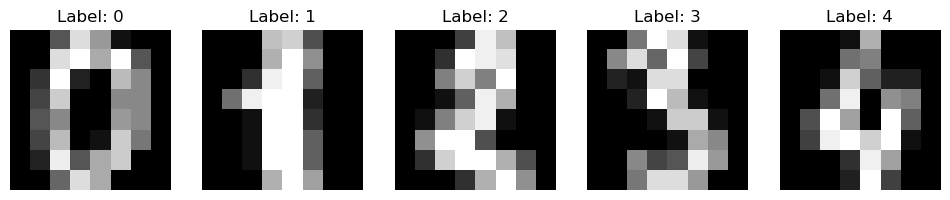

In [5]:
# Get the first five images and their corresponding labels
x = digits.data[:5].reshape(-1, 8, 8)
y = digits.target[:5]

# Plot the first five images
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i in range(5):
    axes[i].imshow(x[i], cmap='gray', interpolation='nearest')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')

plt.show()

In [6]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Data Export

In [7]:
df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
df['target'] = digits.target

# Specify the path where you want to save the CSV file
csv_path = 'C:/Users/negia/Downloads/Assignment 2/digits_dataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_path, index=False)

print(f"Digits dataset exported to: {csv_path}")

Digits dataset exported to: C:/Users/negia/Downloads/Assignment 2/digits_dataset.csv


In [8]:
df=pd.read_csv('digits_dataset.csv')

In [9]:
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [10]:
X = df.drop('target', axis=1)
y = df['target']

Model Training

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [12]:
X_train.shape

(1257, 64)

Data preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit_transform use to do some calculation and then do transformation
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

Model construct

In [14]:
model = svm.SVC
rbf_model = model(kernel='rbf') 
rbf_model.fit(X_train, y_train)

SVC()

In [15]:
y_rbf_pred = rbf_model.predict(X_test)

In [16]:
y_rbf_pred

array([9, 9, 0, 2, 4, 5, 7, 4, 7, 2, 4, 5, 7, 5, 9, 6, 1, 1, 5, 2, 8, 7,
       6, 6, 6, 7, 0, 2, 8, 3, 0, 9, 3, 9, 5, 5, 3, 6, 3, 6, 1, 1, 5, 2,
       0, 4, 8, 3, 7, 4, 1, 5, 5, 1, 4, 8, 8, 7, 3, 9, 6, 3, 5, 4, 2, 6,
       3, 6, 6, 6, 8, 4, 6, 0, 6, 6, 2, 1, 6, 3, 4, 3, 3, 1, 1, 4, 0, 5,
       5, 4, 1, 7, 0, 0, 8, 7, 4, 2, 7, 5, 4, 0, 9, 3, 4, 5, 7, 2, 5, 5,
       5, 2, 1, 3, 2, 0, 1, 9, 7, 3, 2, 1, 6, 6, 0, 7, 0, 7, 5, 0, 7, 6,
       0, 2, 8, 2, 0, 7, 6, 3, 4, 5, 0, 3, 9, 0, 8, 0, 3, 6, 8, 1, 4, 1,
       8, 9, 0, 0, 6, 2, 2, 7, 5, 9, 2, 4, 1, 5, 3, 4, 2, 0, 6, 9, 3, 1,
       0, 0, 7, 4, 4, 4, 3, 9, 5, 3, 4, 9, 2, 8, 2, 4, 4, 7, 2, 7, 1, 0,
       8, 3, 8, 6, 9, 9, 0, 3, 1, 5, 3, 8, 0, 6, 8, 6, 2, 9, 9, 2, 6, 2,
       1, 4, 4, 2, 8, 0, 7, 2, 7, 2, 6, 4, 0, 9, 0, 5, 0, 3, 3, 9, 0, 2,
       7, 0, 1, 2, 2, 7, 3, 2, 0, 2, 2, 5, 1, 2, 6, 7, 0, 5, 9, 3, 5, 2,
       2, 6, 4, 7, 9, 4, 0, 9, 0, 8, 7, 0, 9, 1, 0, 7, 1, 6, 0, 5, 9, 9,
       6, 8, 7, 4, 2, 7, 1, 0, 6, 1, 9, 6, 1, 8, 7,

In [17]:
print("Predictad Values :\n" ,y_rbf_pred[10:15])
print ("Actual Values :\n",y_test[10:15])

Predictad Values :
 [4 5 7 5 9]
Actual Values :
 929     4
503     5
1694    7
1182    5
1488    9
Name: target, dtype: int64


# Accuracy 

In [18]:
from sklearn import metrics
acc_rbf= metrics.accuracy_score(y_test, y_rbf_pred)
print("Accuracy:","{:.2f}".format(acc_rbf*100),"%")

Accuracy: 98.89 %


# Testing the model using random input 

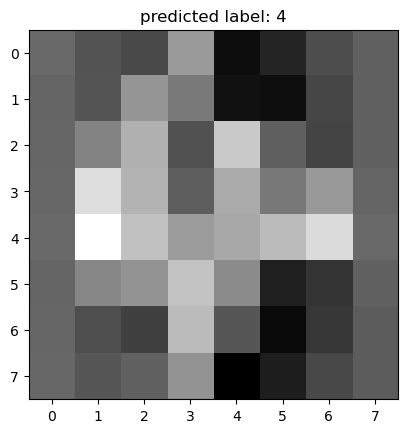

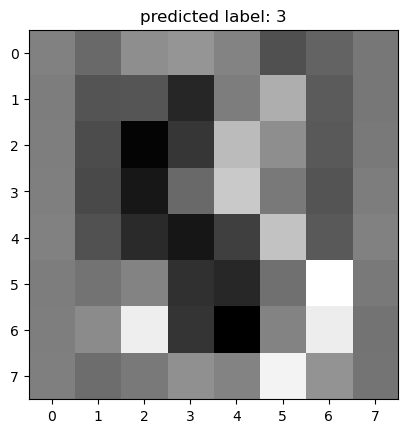

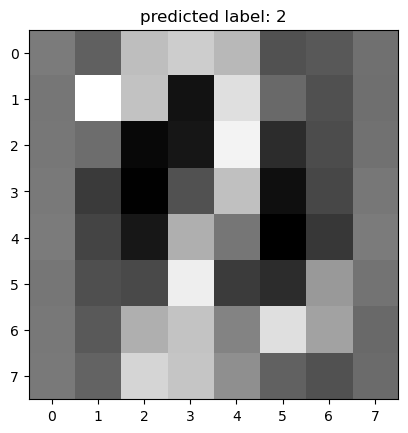

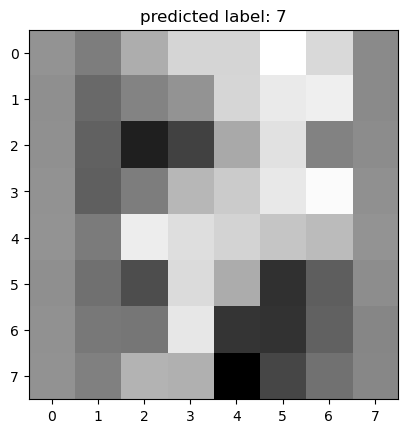

In [19]:
for i in (np.random.randint(0,len(X_test),4)):         
    two_d = (np.reshape(X_test[i], (8, 8)))
    plt.title('predicted label: {0}'. format(y_rbf_pred[i]))
    plt.imshow(two_d, cmap='gray') 
    plt.show()    